In [1]:
import numba
import sys
sys.path.insert(0, '../../python_lib')
import networkx as nx
import numpy as np
import graph_gen
import model
import random
from collections import defaultdict
import torch
import math
import solvers
import imp

In [2]:
%matplotlib inline

In [3]:
from save_data import load_pickle_zip
model_ = load_pickle_zip("../models/models/2d_jone.pkl")
res_ex = load_pickle_zip("../models/solutions/2d_jone.pkl")

In [4]:
betas = res_ex["betas"]

In [6]:
import solvers
imp.reload(solvers)

res_nn = solvers.nn_sol(model_, betas, max_step=1000, bias = True, 
                        z2 = False, x_hat_clip = False)
res_nn["name"]="nn"

fe: -7.031 std_fe: 3.04E-02 M: 0.005 S: 0.684 E: -0.195: 0.0199, B1 = 0.001
fe: -3.659 std_fe: 5.57E-02 M: 0.009 S: 0.658 E: -0.371: 0.0201, B1 = -0.009
fe: -2.591 std_fe: 7.52E-02 M: 0.012 S: 0.618 E: -0.530: 0.0243, B1 = 0.0022
fe: -2.094 std_fe: 8.92E-02 M: 0.011 S: 0.570 E: -0.668: 0.0189, B1 = 0.017
fe: -1.821 std_fe: 9.68E-02 M: 0.011 S: 0.515 E: -0.791: 0.0314, B1 = -0.009
fe: -1.659 std_fe: 9.77E-02 M: 0.010 S: 0.444 E: -0.920: 0.0252, B1 = -0.028
fe: -1.564 std_fe: 8.12E-02 M: 0.008 S: 0.358 E: -1.053: 0.0196, B1 = 0.0391
fe: -1.506 std_fe: 6.08E-02 M: 0.018 S: 0.288 E: -1.146: 0.0235, B1 = 0.0098
fe: -1.470 std_fe: 4.21E-02 M: 0.018 S: 0.248 E: -1.195: 0.0397, B1 = 0.0124
fe: -1.444 std_fe: 3.44E-02 M: 0.010 S: 0.229 E: -1.215: 0.0468, B1 = -0.003
fe: -1.424 std_fe: 2.55E-02 M: 0.013 S: 0.215 E: -1.229: 0.0133, B1 = 0.0038
fe: -1.408 std_fe: 2.19E-02 M: 0.007 S: 0.206 E: -1.237: 0.0247, B1 = 0.0120
fe: -1.395 std_fe: 1.85E-02 M: 0.008 S: 0.200 E: -1.242: 0.0288, B1 = 0.0100
f

In [7]:
res_nn_z2 = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = True, x_hat_clip = False)
res_nn_z2["name"]="nn_z2"

fe: -7.030 std_fe: 2.41E-02 M: 0.011 S: 0.683 E: -0.200: 0.0293, B1 = 0.070
fe: -3.661 std_fe: 4.22E-02 M: 0.007 S: 0.656 E: -0.382: 0.0209, B1 = 0.251
fe: -2.598 std_fe: 5.18E-02 M: 0.008 S: 0.614 E: -0.553: 0.0218, B1 = 0.437
fe: -2.108 std_fe: 5.53E-02 M: 0.006 S: 0.555 E: -0.720: 0.0181, B1 = 0.709
fe: -1.845 std_fe: 5.58E-02 M: 0.006 S: 0.494 E: -0.858: 0.0351, B1 = 1.042
fe: -1.691 std_fe: 5.07E-02 M: 0.018 S: 0.429 E: -0.977: 0.014, B1 = 1.4426
fe: -1.596 std_fe: 4.50E-02 M: 0.008 S: 0.374 E: -1.062: 0.02, B1 = 1.80012
fe: -1.533 std_fe: 3.80E-02 M: 0.008 S: 0.325 E: -1.127: 0.0141, B1 = 2.262
fe: -1.490 std_fe: 3.48E-02 M: 0.016 S: 0.290 E: -1.168: 0.0175, B1 = 2.754
fe: -1.460 std_fe: 3.17E-02 M: 0.006 S: 0.265 E: -1.195: 0.034, B1 = 3.1389
fe: -1.437 std_fe: 3.08E-02 M: 0.009 S: 0.248 E: -1.211: 0.0305, B1 = 3.574
fe: -1.418 std_fe: 2.92E-02 M: 0.009 S: 0.236 E: -1.222: 0.0294, B1 = 4.002
fe: -1.403 std_fe: 2.76E-02 M: 0.011 S: 0.226 E: -1.230: 0.0169, B1 = 4.398
fe: -1.391 s

In [8]:
res_nn_is = solvers.nn_sol(model_, betas, max_step=1000,
                           bias = True, z2 = False, x_hat_clip = False, i_sampling=True)
res_nn_is["name"]="nn_is"

fe: -7.031 std_fe: 3.44E-05 M: 0.007 S: 0.683 E: -0.203: 0.028, B1 = -0.000
fe: -3.665 std_fe: 6.72E-05 M: 0.009 S: 0.654 E: -0.394: 0.0266, B1 = 0.007
fe: -2.605 std_fe: 1.00E-04 M: 0.009 S: 0.610 E: -0.570: 0.0317, B1 = 0.003
fe: -2.118 std_fe: 1.33E-04 M: 0.009 S: 0.551 E: -0.741: 0.0216, B1 = 0.008
fe: -1.857 std_fe: 1.72E-04 M: 0.010 S: 0.490 E: -0.878: 0.0324, B1 = -0.002
fe: -1.703 std_fe: 2.37E-04 M: 0.013 S: 0.429 E: -0.988: 0.0245, B1 = 0.0109
fe: -1.609 std_fe: 6.23E-04 M: 0.023 S: 0.382 E: -1.064: 0.0291, B1 = 0.0014
fe: -1.547 std_fe: 1.25E-03 M: 0.058 S: 0.340 E: -1.123: 0.0184, B1 = -0.014
fe: -1.499 std_fe: 1.45E-03 M: 0.097 S: 0.307 E: -1.158: 0.0274, B1 = -0.004
fe: -1.457 std_fe: 2.60E-04 M: 0.024 S: 0.239 E: -1.218: 0.0174, B1 = -0.013
fe: -1.436 std_fe: 3.06E-04 M: 0.007 S: 0.227 E: -1.230: 0.0159, B1 = 0.0250
fe: -1.418 std_fe: 3.61E-04 M: 0.022 S: 0.220 E: -1.235: 0.0209, B1 = -0.012
fe: -1.403 std_fe: 3.94E-04 M: 0.031 S: 0.208 E: -1.243: 0.0192, B1 = -0.011
fe:

In [9]:
import bp_solver
imp.reload(bp_solver)
import solvers
imp.reload(solvers)
res_bp = solvers.bp_sol(model_, betas, val_rand=0.1)
res_bp["name"]="bp"

fe: -7.031, ener: -0.199, M: 0.000, iter 9
fe: -3.664, ener: -0.395, M: 0.000, iter 11
fe: -2.606, ener: -0.583, M: 0.000, iter 16
fe: -2.123, ener: -0.760, M: 0.000, iter 23
fe: -1.867, ener: -0.924, M: 0.000, iter 39
fe: -1.722, ener: -1.074, M: 0.000, iter 123
fe: -1.616, ener: -1.166, M: 0.306, iter 1000
fe: -1.543, ener: -1.295, M: 0.615, iter 1000
fe: -1.485, ener: -1.290, M: 0.691, iter 1000
fe: -1.473, ener: -1.203, M: 0.507, iter 1000
fe: -1.448, ener: -1.383, M: 0.762, iter 1000
fe: -1.530, ener: -1.458, M: 0.782, iter 1000
fe: -1.513, ener: -1.462, M: 0.804, iter 1000
fe: -1.499, ener: -1.468, M: 0.820, iter 1000
fe: -1.359, ener: -1.304, M: 0.842, iter 1000
fe: -1.343, ener: -1.341, M: 0.874, iter 1000
fe: -1.357, ener: -1.314, M: 0.845, iter 1000
fe: -1.333, ener: -1.283, M: 0.838, iter 1000
fe: -1.338, ener: -1.291, M: 0.842, iter 1000
fe: -1.411, ener: -1.193, M: 0.694, iter 1000


In [10]:
from save_data import save_pickle_zip
name_file="jone_2d"
file_path = "./results/"+name_file + ".pkl"
all_res = {
    "nn":res_nn,
    "nn_is": res_nn_is,
    "nn_z2":res_nn_z2,
    "bp":res_bp
}
save_pickle_zip(file_path, all_res)

# results

In [5]:
from save_data import load_pickle_zip
name_file="jone_2d"
file_path = "./results/"+name_file + ".pkl"

all_res = load_pickle_zip(file_path)
res_nn = all_res["nn"]
res_nn_z2 = all_res["nn_z2"]
res_nn_is = all_res["nn_is"]
res_bp = all_res["bp"]

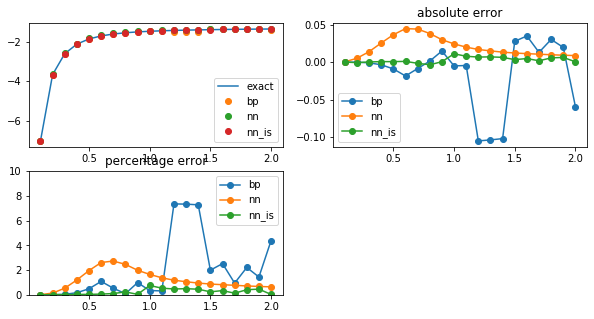

In [6]:
%matplotlib inline
import imp
imp.reload(solvers)
label="fe"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.ylim(-0.001,10)
plt.show()

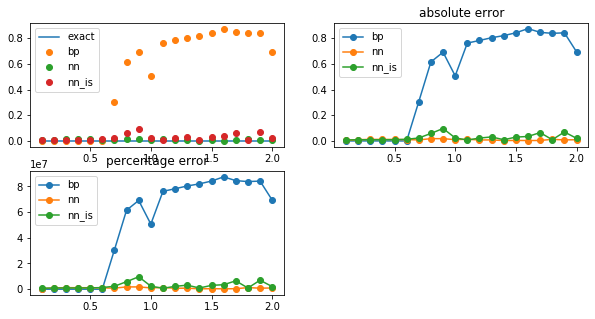

In [7]:
%matplotlib inline
label="M"
plt= solvers.plot_quantity(label, res_ex, [res_bp, res_nn, res_nn_is])
plt.show()

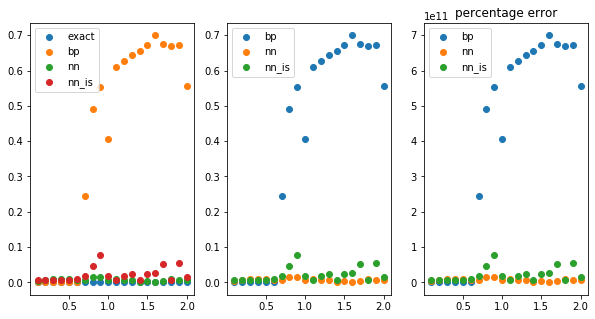

In [8]:
%matplotlib inline
label="M_i"
plt= solvers.plot_quantity_sum(label, res_ex, [res_bp, res_nn, res_nn_is], init_=0)
plt.show()

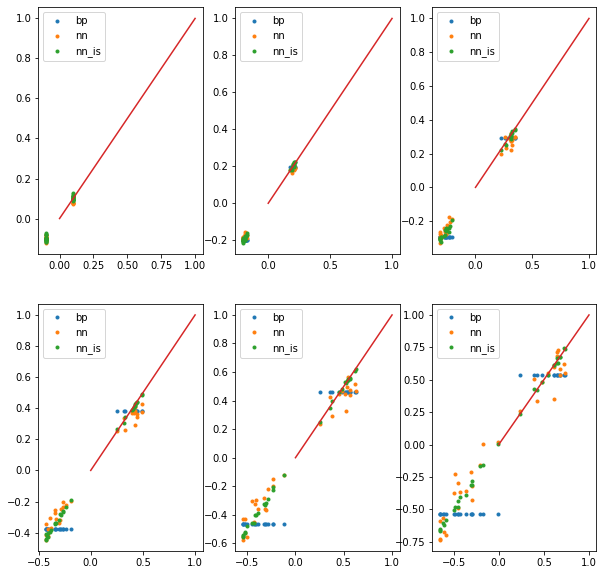

In [9]:
import solvers
imp.reload(solvers)
plt = solvers.plot_all_corr(betas[0:6], res_ex, [res_bp, res_nn, res_nn_is], model_.J_interaction)
plt.show()

# Plots

<function matplotlib.pyplot.show(*args, **kw)>

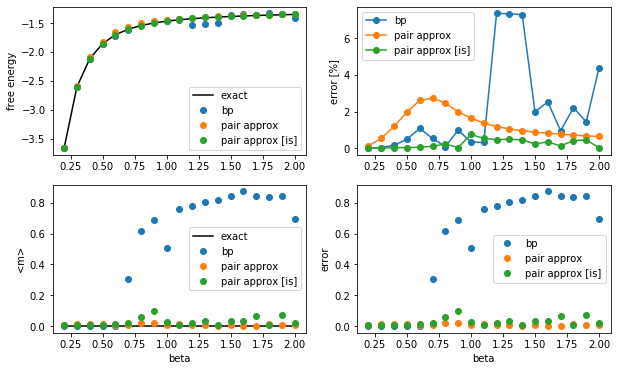

In [10]:
import matplotlib.pyplot as plt
init_ =1
name_file = "jone_2d.pdf"
label="fe"

others = [res_bp, res_nn, res_nn_is]
res_nn["name"] = "pair approx"
res_nn_is["name"] = "pair approx [is]"

plt.figure(figsize=(10,6))
ax1 = plt.subplot(221,)
ax1.set_ylabel("free energy")
plt.plot(res_ex["betas"][init_:], res_ex[label][init_:], label = "exact",
         color="black")
ax1.set_ylabel("free energy")

for other in others:
    plt.plot(other["betas"][init_:], other[label][init_:],"o", label=other["name"],)
plt.legend()
ax3 = plt.subplot(222)
for other in others:
    plt.plot(other["betas"][init_:], 100 * abs(other[label][init_:] - res_ex[label][init_:]) / abs(res_ex[label][init_:] +1e-10), "-o",
             label=other["name"])
plt.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

ax3.set_ylabel("error [%]")
plt.legend()

label="M_i"

res_nn["name"] = "pair approx"

ax4 = plt.subplot(223,)
ax4.set_ylabel("<m>")
ax4.set_xlabel("beta")

ax4.plot(res_ex["betas"][init_:], abs(res_ex[label][init_:]).sum(axis=1)/model_.N,
             label="exact", color="black")
for other in others:
    ax4.plot(other["betas"][init_:], abs(other[label][init_:]).sum(axis=1)/model_.N, "o",
             label=other["name"])
plt.legend()

ax2 = plt.subplot(224)
ax2.ticklabel_format(axis='y', style='sci', scilimits=(-4,4))

for other in others:
    ax2.plot(other["betas"][init_:], abs(abs(other[label][init_:]) - abs(res_ex[label][init_:])).sum(axis=1)/model_.N, "o",
             label=other["name"])
ax2.legend()
plt.ticklabel_format(axis='y', style='sci', scilimits=(-2,4))

ax2.set_xlabel("beta")
ax2.set_ylabel("error")
plt.legend()
plt.savefig("./img/" + name_file)
plt.show